<h1 class="alert alert-info"><center>Récursivité (3/3) : mise en pratique</center></h1>

Cette dernière activité a pour but de mettre en pratique ce qui a été vu sur la récursivité.

<h2 class="alert alert-warning"><center>Exercices</center></h2>

<h2 class="alert alert-info">Exercice 1 : calcul de puissances</h2>

_On rappelle que pour calculer $x^n$ où $x$ est un nombre quelconque et $n$ un entier positif non nul, on multiplie $x$ par lui-même $n$ fois. Par exemple $x^2 = x\times x$, $x^3 = x\times x \times x$, etc. De plus, pour $n=0$ on a toujours $x^0 = 1$._

1. Compléter la fonction `puissance_iter` ci-dessous pour qu'elle vérifie la documentation proposée.

In [1]:
def puissance_iter(x, n):
    '''
    x est de type numérique (entier ou flottant) et n est un entier naturel
    Renvoie à l'aide d'une méthode itérative la valeur de x**n sans utiliser l'opérateur **
    '''
    assert isinstance(x,int) or type(x) == float # assertion sur x
    assert type(x) == int and x >= 0 # assertion sur n
    puissance = 1
    for i in range(n): # On répète n fois
        puissance = puissance * x # On fait une multiplication de plus
    return puissance # À la fin puissance contient bien x*x*x*x*x*..*x

Les quatre cellules ci-dessous permettent de tester votre code. Elles doivent toutes renvoyer `True` lors de leur exécution.

In [2]:
puissance_iter(10, 0) == 1

True

In [3]:
puissance_iter(0, 4) == 0

True

In [4]:
puissance_iter(3, 1) == 3

True

In [5]:
puissance_iter(3, 4) == 81

True

2. On donne ci-dessous une version récursive du calcul de $x^n$ :
    
```python
def puissance_rec(x,n):
    '''
    x est de type numérique (entier ou flottant) et n est un entier naturel
    Renvoie à l'aide d'une méthode récursive la valeur de x**n sans utiliser l'opérateur **
    '''
    assert isinstance(x, int) or isinstance(x, float)
    assert isinstance(n, int) and n >= 0
    if n == 0:
        return 1
    if n == 1:
        return x
    else:
        return x*puissance_rec(x,n-1)
```

Justifier que cette fonction est bien une fonction récursive bien formée.


Cette fonction est **récursive bien formée** car:
    
- Elle est récursive (appel dans le else);
- elle contient des cas de bases (pour $n = 0$ et $n = 1$);
- l'appel récursif fait varier $n$ en $n-1$, ainsi la suite des valeurs de $n$ est strictement décroissante et $n$ est un entier naturel. Donc $n$ atteindra les cas de bases et la fonction s'arrêtera.

Dresser l'arbre d'appels produit à l'exécution de `puissance_rec(2,5)`. En déduire la taille maximale de la pile d'exécution.

_On pourra exécuter la cellule ci-dessous pour visualiser la création de l'arbre._

In [6]:
from IPython.display import HTML
HTML("""<iframe src="https://www.recursionvisualizer.com/?function_definition=def%20puissance_rec%28x%2Cn%29%3A%0A%20%20%20%20if%20n%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20return%201%0A%20%20%20%20if%20n%20%3D%3D%201%3A%0A%20%20%20%20%20%20%20%20return%20x%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20return%20x*puissance_rec%28x%2Cn-1%29&function_call=puissance_rec%282%2C5%29" width="800" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>""")


Ici la fonction `puissance_rec` s'appelle au maximum 5 fois, c'est la hauteur maximale de la pile pour cet appel.


3. Une autre méthode plus efficace pour calculer la puissance $n$-ème d'un nombre est l'algorithme d'_exponentiation rapide_ basé sur les égalités suivantes : $x^{2n} = (x^2)^n$ et $x^{2n+1} = x(x^2)^n$

Combien de multiplications sont nécessaires au calcul de $2^{65}$ avec cette méthode ?


Pour calculer $2^{65}$ on va devoir calculer les termes suivants:

- $2 \times ( 2 \times 2 )^{32}$
- $(4 \times 4)^{16}$
- $(16 \times 16)^{8}$
- $(256 \times 256)^{4}$
- $(65536 \times 65536)^{2}$
- $(4294967296 \times 4294967296)^{1}$.

On a donc besoin de 7 multiplications.


Ecrire dans la cellule ci-dessous un programme Python implémentant de manière récursive l'algorithme d'exponentiation rapide.

In [11]:
def exponentiation_rapide(x, n):
    '''
    x est de type numérique (entier ou flottant) et n est un entier naturel
    Renvoie la valeur de x**n en utilisant l'algorithme d'exponentiation rapide
    '''
    assert isinstance(x,int) or type(x) == float
    assert isinstance(n,int) and n >= 0
    
    if n == 0:
        return 1
    elif n == 1:
        return x
    elif n % 2 == 0:
        k = n // 2
        x_carre = x*x
        return exponentiation_rapide(x_carre,k)
    else:
        k = (n-1)//2
        x_carre = x*x
        return x*exponentiation_rapide(x_carre,k)

Compléter la cellule ci-dessous avec le code de la fonction écrit précédemment. Exécuter cette cellule et déterminer l'arbre d'appels et la taille maximale de la pile d'exécution lors de l'exécution de l'instruction `exponentiation_rapide(2, 65)`. Cette taille est-elle cohérente avec le résultat obtenu au début de la question 3 ?

In [12]:
from tutor import tutor

def exponentiation_rapide(x, n):
    '''
    x est de type numérique (entier ou flottant) et n est un entier naturel
    Renvoie la valeur de x**n en utilisant l'algorithme d'exponentiation rapide
    '''
    assert isinstance(x,int) or type(x) == float
    assert isinstance(n,int) and n >= 0
    
    if n == 0:
        return 1
    elif n == 1:
        return x
    elif n % 2 == 0:
        k = n // 2
        x_carre = x*x
        return exponentiation_rapide(x_carre,k)
    else:
        k = (n-1)//2
        x_carre = x*x
        return x*exponentiation_rapide(x_carre,k)

exponentiation_rapide(2, 65)

tutor()

<iframe id="basthon-pythontutor-iframe-0" style="width: 100%; height: 400px;" frameborder="0" src="data:text/html;charset=utf-8,%3C%21DOCTYPE%20html%3E%0A%3Chtml%3E%0A%20%20%3Chead%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//capytale2.ac-paris.fr/p/basthon/n/assets/0.62.21/python3/modules/extern/pytutor-main.min.css%22/%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//capytale2.ac-paris.fr/p/basthon/n/assets/0.62.21/python3/modules/extern/pytutor-main.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20let%20sent_height%3B%0A%20%20%20%20%20%20%24%28document%29.ready%28function%28%29%20%7B%0A%20%20%20%20%20%20%20%20%20%20//%20managing%20iframe%20resize%0A%20%20%20%20%20%20%20%20%20%20const%20send%20%3D%20%28%29%20%3D%3E%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20const%20new_height%20%3D%20document.body.offsetHeight%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20if%20%28sent_height%20%3D%3D%3D%20new_height%29%20return%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20sent_height%20%3D%20new_height%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20window.parent.postMessage%28%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20type%3A%20%22pytutor-iframe-resize%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20target%3A%20%22basthon-pythontutor-iframe-0%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20sent_height%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%2C%20%27%2A%27%29%3B%0A%20%20%20%20%20%20%20%20%20%20%7D%3B%0A%20%20%20%20%20%20%20%20%20%20const%20o%20%3D%20new%20ResizeObserver%28send%29%3B%0A%20%20%20%20%20%20%20%20%20%20o.observe%28document.body%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20const%20t%20%3D%20%7B%22code%22%3A%20%22def%20exponentiation_rapide%28x%2C%20n%29%3A%5Cn%20%20%20%20%27%27%27%5Cn%20%20%20%20x%20est%20de%20type%20num%5Cu00e9rique%20%28entier%20ou%20flottant%29%20et%20n%20est%20un%20entier%20naturel%5Cn%20%20%20%20Renvoie%20la%20valeur%20de%20x%2A%2An%20en%20utilisant%20l%27algorithme%20d%27exponentiation%20rapide%5Cn%20%20%20%20%27%27%27%5Cn%20%20%20%20assert%20isinstance%28x%2Cint%29%20or%20type%28x%29%20%3D%3D%20float%5Cn%20%20%20%20assert%20isinstance%28n%2Cint%29%20and%20n%20%3E%3D%200%5Cn%20%20%20%20%5Cn%20%20%20%20if%20n%20%3D%3D%200%3A%5Cn%20%20%20%20%20%20%20%20return%201%5Cn%20%20%20%20elif%20n%20%3D%3D%201%3A%5Cn%20%20%20%20%20%20%20%20return%20x%5Cn%20%20%20%20elif%20n%20%25%202%20%3D%3D%200%3A%5Cn%20%20%20%20%20%20%20%20k%20%3D%20n%20//%202%5Cn%20%20%20%20%20%20%20%20x_carre%20%3D%20x%2Ax%5Cn%20%20%20%20%20%20%20%20return%20exponentiation_rapide%28x_carre%2Ck%29%5Cn%20%20%20%20else%3A%5Cn%20%20%20%20%20%20%20%20k%20%3D%20%28n-1%29//2%5Cn%20%20%20%20%20%20%20%20x_carre%20%3D%20x%2Ax%5Cn%20%20%20%20%20%20%20%20return%20x%2Aexponentiation_rapide%28x_carre%2Ck%29%5Cn%5Cnexponentiation_rapide%282%2C%2065%29%22%2C%20%22trace%22%3A%20%5B%7B%22line%22%3A%201%2C%20%22event%22%3A%20%22step_line%22%2C%20%22func_name%22%3A%20%22%3Cmodule%3E%22%2C%20%22globals%22%3A%20%7B%7D%2C%20%22ordered_globals%22%3A%20%5B%5D%2C%20%22stack_to_render%22%3A%20%5B%5D%2C%20%22heap%22%3A%20%7B%7D%2C%20%22stdout%22%3A%20%22%22%7D%2C%20%7B%22line%22%3A%2022%2C%20%22event%22%3A%20%22step_line%22%2C%20%22func_name%22%3A%20%22%3Cmodule%3E%22%2C%20%22globals%22%3A%20%7B%22exponentiation_rapide%22%3A%20%5B%22REF%22%2C%201%5D%7D%2C%20%22ordered_globals%22%3A%20%5B%22exponentiation_rapide%22%5D%2C%20%22stack_to_render%22%3A%20%5B%5D%2C%20%22heap%22%3A%20%7B%221%22%3A%20%5B%22FUNCTION%22%2C%20%22exponentiation_rapide%28x%2C%20n%29%22%2C%20null%5D%7D%2C%20%22stdout%22%3A%20%22%22%7D%2C%20%7B%22line%22%3A%201%2C%20%22event%22%3A%20%22call%22%2C%20%22func_name%22%3A%20%22exponentiation_rapide%22%2C%20%22globals%22%3A%20%7B%22exponentiation_rapide%22%3A%20%5B%22REF%22%2C%201%5D%7D%2C%20%22ordered_globals%22%3A%20%5B%22exponentiation_rapide%22%5D%2C%20%22stack_to_render%22%3A%20%5B%7B%22func_name%22%3A%20%22exponentiation_rapide%22%2C%20%2


On a une pile d'appels de hauteur 7, ce qui correspond bien aux 7 multiplications à effectuer.
On peut l'observer à l'étape 63 de python tutor.

<h2 class="alert alert-info">Exercice 2 : suite de Fibonacci</h2>

La _suite de Fibonacci_ est une suite de nombres entiers obtenue de la façon suivante : les deux premiers termes de la suites sont respectivement égaux à $0$ et $1$, et les termes suivants sont obtenus en faisant la somme des deux termes précédents.

Voir les liens suivants : <a href='https://fr.wikipedia.org/wiki/Suite_de_Fibonacci'>suite de Fibonacci</a> et <a href='https://images.math.cnrs.fr/Mysteres-arithmetiques-de-la-suite-de-Fibonacci.html'>lien CNRS</a>

1. Calculer à la main les dix premiers termes de cette suite.


0,1,1,2,3,5,8,13,21,34

2. Compléter la fonction récursive `fibo_rec` ci-dessous.

In [13]:
def fibo_rec(n):
    '''
    n est un entier naturel
    Renvoie, à l'aide d'un calcul récursif, la valeur du terme de rang n de la suite de Fibonacci
    '''
    if n <= 1:
        return n
    else:
        return fibo_rec(n-1) + fibo_rec(n-2)

Les quatre cellules ci-dessous permettent de tester votre code. Elles doivent toutes renvoyer `True` lors de leur exécution.

In [14]:
fibo_rec(0) == 0

True

In [15]:
fibo_rec(1) == 1

True

In [16]:
fibo_rec(6) == 8

True

In [17]:
fibo_rec(9) == 34

True

3. Que constate-t-on lorsque l'on exécute la cellule suivante ?

In [18]:
fibo_rec(35)

9227465


Elle est particulièrement lente à s'exécuter.


Exécuter la cellule suivante donnant l'arbre d'appels obtenu lors de l'exécution de l'instruction `fibo_rec(5)`.

In [19]:
from IPython.display import HTML
HTML("""<iframe src="https://www.recursionvisualizer.com/?function_definition=def%20fibo_rec%28n%29%3A%0A%20%20%20%20if%20n%20%3C%3D%201%20%3A%0A%20%20%20%20%20%20%20%20return%20n%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20return%20fibo_rec%28n-1%29%20%2B%20fibo_rec%28n-2%29&function_call=fibo_rec%285%29" width="800" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>""")

Que constate-t-on sur cet arbre d'appels ? Cela corrobore-t-il l'observation précédente ?


On appelle plusieurs fois fibo_rec avec les mêmes arguments, ce qui prend énormément de temps alors que on pourrait réutiliser ces valeurs.
Cela explique l'observation précédente.

4. Ecrire ci-dessous une fonctin `fibo_iter`permettant de calculer le $n$-ième terme de la suite de Fibonacci de manière itérative.

In [29]:
def fibo_iter(n):
    '''
    n est un entier naturel
    Renvoie, à l'aide d'un calcul itératif, la valeur du terme de rang n de la suite de Fibonacci
    '''
    dernier = 1 # terme de rang n-1
    avant_dernier= 0 # terme de rang n-2
    
    if n <= 1:
        return n
    
    for i in range(n-1): #On calcule les termes restants pour celui de rang n
        nouveau = avant_dernier + dernier # On calcule un nouveau terme
        avant_dernier = dernier #le terme de rang n-1 devient celui de rang n-2
        dernier = nouveau #le nouveau terme calculé passe au rang n-1 pour le tour suivant.
        
    return nouveau

Les cinq cellules ci-dessous permettent de tester votre code. Elles doivent toutes renvoyer `True` lors de leur exécution.

In [30]:
fibo_iter(0) == 0

True

In [31]:
fibo_iter(1) == 1

True

In [34]:
fibo_iter(6) == 8

True

In [35]:
fibo_iter(9) == 34

True

In [36]:
fibo_iter(100) == 354224848179261915075

True

<h2 class="alert alert-info">Exercice 3 : un peu de dessin</h2>

On considère la fonction Python suivante :

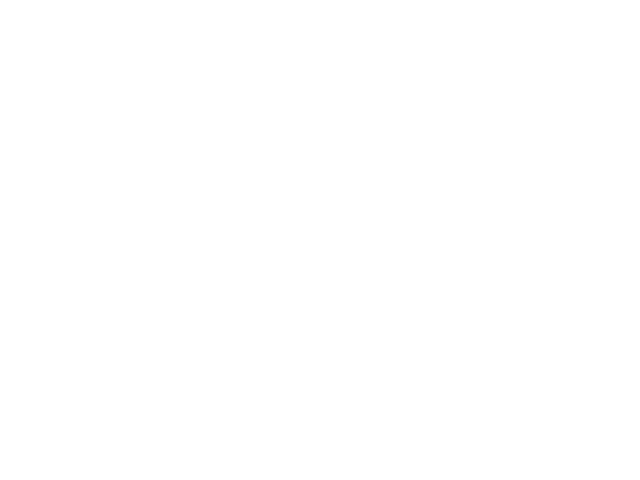

In [46]:
from turtle import *

def trace_cercles_rec(x,y,r):
    up()
    goto(x,y)
    down()
    circle(r)
    if r > 1:
        trace_cercles_rec(x+3*r//2,y+r//2,r//2)
        trace_cercles_rec(x,y+2*r,r//2)
        
trace_cercles_rec(0,0,32)
done()

1. Exécuter cette cellule et décrire l'ordre du tracé obtenu (en numérotant par exemple sur un dessin les cercles dans l'ordre dans lequel ils sont tracés).

_On pourra tester successivement dans le `if` les conditions `r > 20`, `r > 10` et `r > 1`._


On trace le cercle au centre, puis tout les cercles à droite, puis tout ceux au dessus et ceci récursivement.
On ne trace plus de cercle à droite quand le rayon serait trop petit.

2. Quel argument de la fonction `trace_cercles_rec` permet d'assurer qu'elle n'est appelée qu'un nombre fini de fois ?


C'est l'argument r qui permet un appel finit car ses valeurs sont strictement décroissantes et sont des valeurs flottantes, r passera donc toujours en dessous du seuil défini au bout d'un nombre fini d'étapes.


3. **(optionnel)** Modifier la fonction `trace_cercles_rec` en une fonction `trace_cercles_complet_rec` afin de compléter le tracé pour que le cercle initial soit entouré de quatre cercles plus petits. Ajouter des couleurs.

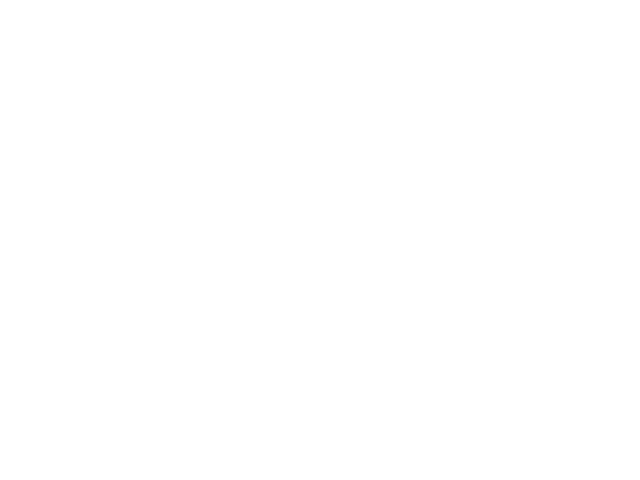

In [52]:
from turtle import *

def trace_cercles_complet_rec(x,y,r):
    up()
    goto(x,y)
    down()
    circle(r)
    if r > 20:
        trace_cercles_complet_rec(x+3*r//2,y+r//2,r//2)
        trace_cercles_complet_rec(x,y+2*r,r//2)
        trace_cercles_complet_rec(x-3*r//2,y+r//2,r//2)
        trace_cercles_complet_rec(x,y-r,r//2)
        
trace_cercles_complet_rec(0,0,32)
done()

<h2 class="alert alert-info">Exercice 4 : recherche dichotomique</h2>

_On rappelle que la recherche dichotomique est un algorithme de recherche pour trouver la position d'un élément dans un tableau trié. Le principe est le suivant : comparer l'élément avec la valeur de la case au milieu du tableau ; si les valeurs sont égales, la tâche est accomplie, sinon on recommence dans la moitié du tableau pertinente._

Cet algorithme est implémenté en Python à l'aide d'une fonction `recherche_dicho` dont la documentation est la suivante :
```python
def recherche_dicho(liste, elem):
    """
    liste est une liste (type list) de valeurs numériques triées par ordre croissant
    elem est la valeur à rechercher dans la liste (on suppose qu'il y est présent)
    Renvoie l'indice d'une occurrence de l'élément elem à l'aide d'une recherche dichotomique
    """
```

1. La figure ci-dessous donne la pile d'exécution obtenue lors de l'appel `recherche_dicho([1,1,1,2,2,2,3,5,5,6,8,8,9,10],3)`. 

<img src='https://capytale2.ac-paris.fr/web/sites/default/files/2023/02-28/13-56-40/Recherche_dicho.PNG' alt='recherche_dicho' style='width:60%; height:auto;'>

Expliquer les différentes étapes de l'algorithme qui ont permis d'obtenir cette figure.


Pour obtenir cette figure, on a divisé à chaque appel le tableau en 2 et on a récupéré la moitié où peut se trouver l'élément, par rapport à l'élément du milieu.

1. On compare 3 à l'élément d'indice 7 (5), 3 est plus petit, donc on rappelle avec la moitié inférieure du tableau.
2. On compare 3 à l'élément d'indice 3 (2), 3 est plus grand, donc on rappelle avec la moitié supérieure du tableau.
3. On compare 3 à l'élément d'indice 1 (2), 3 est plus grand, donc on rappelle avec la moitié supérieure du tableau.
4. On compare 3 à l'unique élément de la liste d'indice 0, il s'agit de 3 on renvoit donc l'indice 0.


2. La figure ci-dessous donne à présent l'arbre d'appels obtenue lors de l'appel `recherche_dicho([1,1,1,2,2,2,3,5,5,6,8,8,9,10],3)`.

<img src='https://capytale2.ac-paris.fr/web/sites/default/files/2023/02-28/14-14-42/Recherche_dicho_2.PNG' alt='recherche_dicho' style='width:35%; height:auto;'>

Expliquer comment ont été obtenues les différentes valeurs renvoyées par les différents appels récursifs (on utilisera aussi les valeurs obtenues dans la figure de la question 1).


Pour chaque appel la valeur de retour est celle renvoyée par le sous appel à laquelle on additionne l'indice de début de la liste passée à ce sous-appel.
Ainsi:

- le dernier appel (non récursif) renvoit 0 car 3 est en position 0;
- l'appel supérieur additionne 2 car la sous-liste `[3]` débute à l'indice 2 et renvoit donc $0+2=2$;
- l'appel supérieur additionne 4 car la sous-liste `[2,2,3]` débute à l'indice 4 et renvoit donc $2+4=6$;
- l'appel supérieur additionne 0 car la sous-liste `[1,1,1,2,2,2,3]` débute à l'indice 0 et renvoit donc $6+0=0$.


3. En vous aidant des deux questions précédentes, compléter le corps de la fonction `recherche_dicho` ci-dessous.

_On rappelle que si `L` est une liste et `m` un entier compris entre `1` et `len(L)-1`, alors_
 - _l'instruction `L[:m]` renvoie une liste contenant les éléments de `L` d'indices allant de `0` à `m-1` ;_
 - _l'instruction `L[m:]` renvoie une liste contenant les éléments de `L` d'indices allant de `m` à `len(L)-1`._

_Par exemple, si `L = [1, 5, 6, 3]`, alors `L[:2]` est la sous-liste `[1, 5]` et `L[2:]` est la sous-liste `[6, 3]`._

In [55]:
def recherche_dicho(liste, elem):
    """
    liste est une liste (type list) de valeurs numériques triées par ordre croissant
    elem est la valeur à rechercher dans la liste (on suppose qu'il y est présent)
    Renvoie l'indice d'une occurrence de l'élément elem à l'aide d'une recherche dichotomique
    """

    taille = len(liste) # Longueur de la liste
    if taille == 1: # On suppose l'élément présent dans la liste
        return 0
    else:
        med = taille//2 # division entière : rang de la valeur médiane
        if liste[med] == elem:
            return med
        elif liste[med] > elem:
            # L'élement recherché est < à la valeur médiane
            return recherche_dicho(liste[:med],elem)
        else:
            # L'élément recherché est > à la valeur médiane 
            return med+1+recherche_dicho(liste[med+1:],elem)

Les trois cellules suivantes permettent de tester votre code. Elles doivent toutes renvoyer `True` lors de leur exécution.

In [56]:
recherche_dicho([1,1,1,2,2,2,3,5,5,6,8,8,9,10],3) == 6

True

In [57]:
recherche_dicho([1,1,1,2,2,2,3,5,5,6,8,8,9,10],1) == 1

True

In [58]:
recherche_dicho([1,1,1,2,2,2,3,5,5,6,8,8,9,10],10) == 13

True

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Ce document  est mis à disposition selon les termes de la <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licence Creative Commons Attribution -  Partage dans les Mêmes Conditions 4.0 International</a>.
Pour toute question : <a href="mailto:charles.poulmaire@ac-versailles.fr">charles.poulmaire@ac-versailles.fr</a> ou <a href="mailto:pascal.remy@ac-versailles.fr">pascal.remy@ac-versailles.fr</a>